In [1]:
# from https://towardsdatascience.com/polynomial-regression-bbe8b9d97491

import numpy as np
import operator
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

### Linear Regression 1 Degree

This originally came from the source above and I just did it for practice. 

I will just go through the steps that shows how adding more polynomial features to your model will help improve the accuracy and will fit the data better.

NOTE: Must get metrics before doing a sort

In [2]:
# generate seed value for pseudo random number
np.random.seed(0)
size=50
mu = 3
sigma = 1.5 


# create x values
x = 2 - 3 * np.random.normal(0,1,size)
# create y values
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(mu,sigma, size)

# use np.newaxis to increase the dimension of the existing array by one more dimension
x = x[:, np.newaxis]
y = y[:, np.newaxis]

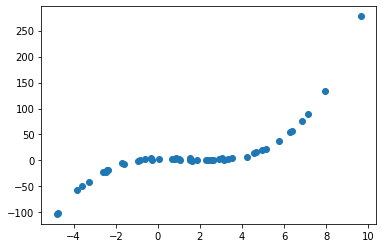

In [5]:
fig, ax = plt.subplots()

ax.scatter(x,y)

plt.show()
plt.close()

In [6]:
# create model
model = LinearRegression()
# fit model
model.fit(x,y)
# make predictions
pred = model.predict(x)

# get metrics
mae = metrics.mean_absolute_error(y, pred)
rmse = metrics.mean_squared_error(y, pred, squared=False)
r2 = metrics.r2_score(y, pred)

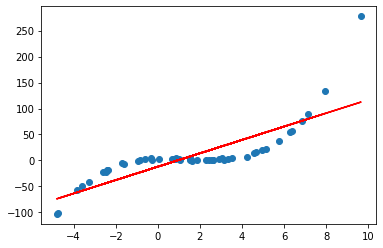

In [7]:
# plot
fig, ax = plt.subplots()

ax.scatter(x,y)
ax.plot(x, pred, color='r')
plt.show()
plt.close()

In [8]:
results = [['mae', mae], ['rMSE', rmse], ['r2', r2]]
tabulate(results, tablefmt='html', headers=['Metric', 'Score'])

Metric,Score
mae,21.6394
rMSE,31.5359
r2,0.655819


### Polynomial Degree 2

In [9]:
# generate seed value for pseudo random number
x = None
y = None
np.random.seed(0)

# create x values
x = 2 - 3 * np.random.normal(0,1,size)
# create y values
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(mu,sigma, size)

# use np.newaxis to increase the dimension of the existing array by one more dimension
x = x[:, np.newaxis]
y = y[:, np.newaxis]

In [10]:
# create new model with higher degree
x_poly = PolynomialFeatures(degree=2).fit_transform(x)
model.fit(x_poly,y)
poly_pred = model.predict(x_poly)

In [11]:
# get metrics
mae = metrics.mean_absolute_error(y, poly_pred)
rmse = metrics.mean_squared_error(y, poly_pred, squared=False)
r2 = metrics.r2_score(y, poly_pred)

results = [['mae', mae], ['rmse', rmse], ['r2', r2]]
tabulate(results, tablefmt='html', headers=['Metric', 'Score'])

Metric,Score
mae,20.8915
rmse,27.3985
r2,0.740205


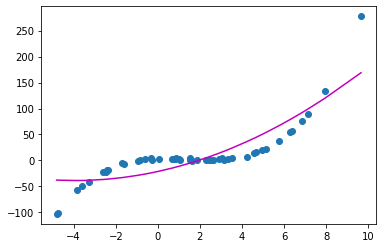

In [12]:
# NOTE: have to sort these values BEFORE PLOTTING!
# plot
fig, ax = plt.subplots()

ax.scatter(x,y)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,poly_pred), key=sort_axis)
# unzip values
x, poly_pred = zip(*sorted_zip)
ax.plot(x, poly_pred, color='m')

plt.show()
plt.close()

## Polynomial Degree 3

In [13]:
# generate seed value for pseudo random number
x = None
y = None
np.random.seed(0)
# create x values
x = 2 - 3 * np.random.normal(0,1,size)
# create y values
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(mu,sigma, size)

# use np.newaxis to increase the dimension of the existing array by one more dimension
x = x[:, np.newaxis]
y = y[:, np.newaxis]

In [14]:
# create new model with higher degree
x_poly = PolynomialFeatures(degree=3).fit_transform(x)

model.fit(x_poly,y)
poly_pred = model.predict(x_poly)

In [15]:
# get metrics
mae = metrics.mean_absolute_error(y, poly_pred)
rmse = metrics.mean_squared_error(y, poly_pred, squared=False)
r2 = metrics.r2_score(y, poly_pred)

results = [['mae', mae], ['rmse', rmse], ['r2', r2]]
tabulate(results, tablefmt='html', headers=['Metric', 'Score'])

Metric,Score
mae,1.05765
rmse,1.29493
r2,0.99942


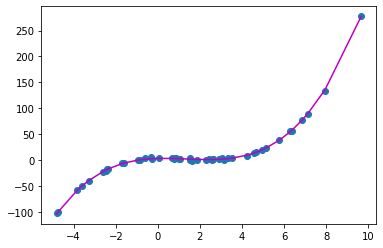

In [16]:
# NOTE: have to sort these values BEFORE PLOTTING!
# plot
fig, ax = plt.subplots()

ax.scatter(x,y)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,poly_pred), key=sort_axis)
# unzip values
x, poly_pred = zip(*sorted_zip)
ax.plot(x, poly_pred, color='m')

plt.show()
plt.close()

Neat! we can see the regression line fits the data better and better as our model becomes more 'complex' and incorporates more features. $R^{2}$ is very high at .999 and defintely overfit for a predction model but still interesting to see.

### Further Investigation

Here I want to play around with some of the variables and see whats going on

In [17]:
# generate seed value for pseudo random number
x = None
y = None
np.random.seed(0)
size = 50
mu = 5
sigma = 1 
# create x values
x = 2 - 3 * np.random.normal(0,1,size)
# create y values
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(mu,sigma, size)



In [18]:
# use np.newaxis to increase the dimension of the existing array by one more dimension
x = x[:, np.newaxis]
y = y[:, np.newaxis]

In [19]:
y.shape

(50, 1)

In [20]:
x.shape

(50, 1)

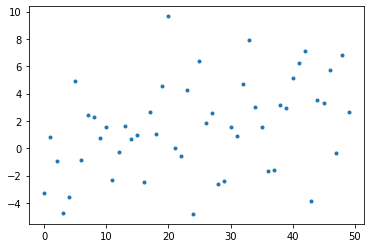

In [21]:
fig, ax = plt.subplots()

ax.plot(x, '.')

plt.show()
plt.close()

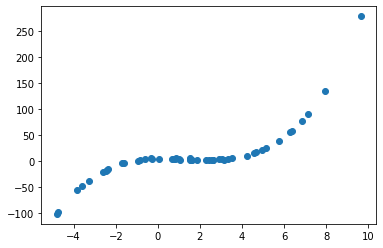

In [22]:
fig, ax = plt.subplots()

ax.scatter(x,y)

plt.show()
plt.close()

Ok now lets see what happens when I use the Poly Features and transform x

In [32]:
# create new feature matrix of higher degree
x_poly = PolynomialFeatures(degree=2).fit_transform(x)

In [33]:
x_poly.shape

(50, 3)

In [34]:
x_poly[:1]

array([[ 1.        , -3.29215704, 10.83829796]])

In [35]:
x[:1]

array([[-3.29215704]])

This makes sense its just transforming the input vector to include more features of defined polynomial

Because we input degree=2 into the Poly Features method our new feature vector now has our original x and the x*x value since our new model went from

$y = \beta_{0} + \beta_{1}x$ 

to

$y = \beta_{0} + \beta_{1}x + \beta_{2}x*x$

which is the same as

$y = \beta_{0} + \beta_{1}x + \beta_{2}x^2$



Remember the $\beta_{n}$ are the coeffecients, that is what we are trying to predict/model/find, the x values are our features


Now I want to see how the regression line changes from degree to degree and plot all the points. Regression lines find the line of best i.e. They try to minimize the error between points, so I want to see how the data 'pulls' the line into a line of better fit. Lets see

In [36]:
x_poly = PolynomialFeatures(degree=2).fit_transform(x)
model.fit(x_poly,y)
pred = model.predict(x_poly)

x_poly2 = PolynomialFeatures(degree=3).fit_transform(x)
model.fit(x_poly2,y)
pred2 = model.predict(x_poly2)

In [37]:
# lets create the x values of the features x, x*x and x*x*x
test1 = [x[1] for x in x_poly2[:]]
test2 = [x[2] for x in x_poly2[:]]
test3 = [x[3] for x in x_poly2[:]]

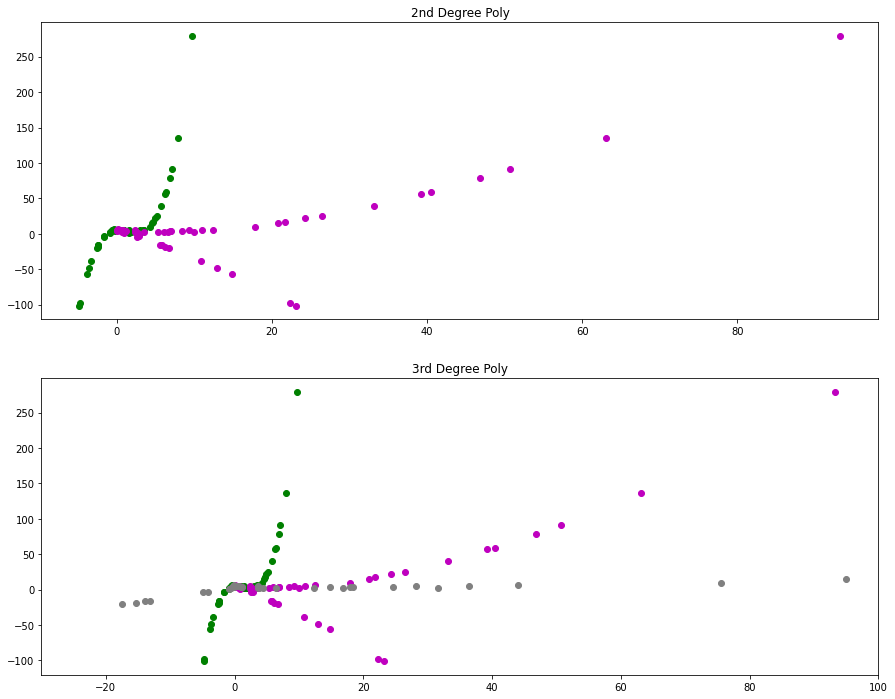

In [38]:
fig, (ax, ax2) = plt.subplots(2,1,figsize=(15,12))

ax.scatter(test1, y, color='g')
ax.scatter(test2, y, color='m')
ax.set_title("2nd Degree Poly")

ax2.scatter(test1, y, color='g')
ax2.scatter(test2, y, color='m')
ax2.scatter(test3, y, color='grey')
ax2.set_title("3rd Degree Poly")

ax2.set_xlim(-30, 100)

plt.show()
plt.close()

Neat so we have all the points plotted on a graph and can see the original data points in green. 

2nd degree poly data points (x*x) are in maroon and 3rd degree data points are in grey (x*x*x)

You can start to visualize where the regression line will be by looking at the data sets and trying to find a line of best fit. Each data point in each set will try to 'pull' the line in that direction so as to minimize error.

If we have only have the x*x term then the line is a quadratic and will look like an parabola, so you can try to visualize where the best fit parabola would go in the top graph.


Lets plot the line now to check it out.

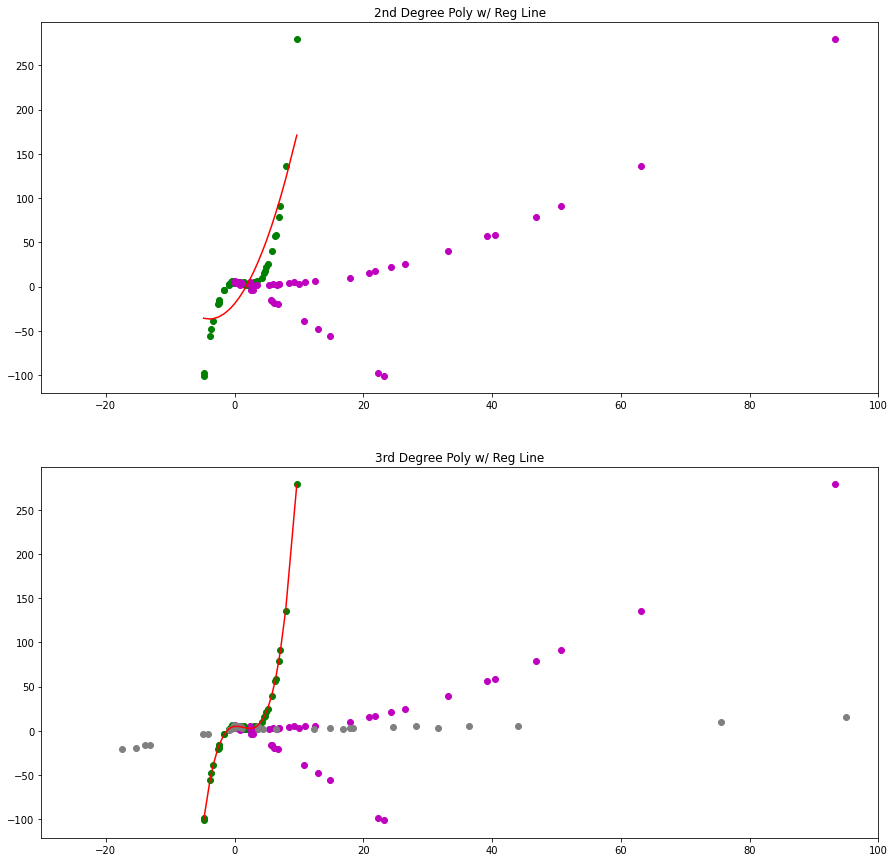

In [39]:
# plot
fig, (ax,ax2) = plt.subplots(2,1, figsize=(15,15))

ax.scatter(x,y, color='g')
ax.scatter(test2, y, color='m')
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,pred), key=sort_axis)
x_, pred_ = zip(*sorted_zip)
ax.plot(x_, pred_, color='r')
ax.set_xlim(-30, 100)
ax.set_title("2nd Degree Poly w/ Reg Line")

ax2.scatter(x,y, color='g')
ax2.scatter(test2, y, color='m')
ax2.scatter(test3, y, color='grey')
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,pred2), key=sort_axis)
x_, pred_ = zip(*sorted_zip)
ax2.plot(x_, pred_, color='r')
ax2.set_xlim(-30, 100)
ax2.set_title("3rd Degree Poly w/ Reg Line")

plt.show()
plt.close()